# Diabetes Prediction Analysis

**AICTE Faculty ID:** 1-3241967546  
**Faculty Name:** Milav Jayeshkumar Dabgar  
**Date:** July 17, 2025

---

## Objective
Analyze diabetes prediction dataset and prepare data for classification modeling.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

plt.style.use('default')
print("Libraries imported successfully!")

Libraries imported successfully!


## Load and Explore Data

In [2]:
# Load dataset
df = pd.read_csv('Diabetespred.csv')

print(f"Dataset shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset shape: (499, 9)

Column names:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Basic info
print("Dataset Info:")
print(df.info())
print("\nStatistical Summary:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               499 non-null    int64  
 1   Glucose                   499 non-null    int64  
 2   BloodPressure             499 non-null    int64  
 3   SkinThickness             499 non-null    int64  
 4   Insulin                   499 non-null    int64  
 5   BMI                       499 non-null    float64
 6   DiabetesPedigreeFunction  499 non-null    float64
 7   Age                       499 non-null    int64  
 8   Outcome                   499 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.2 KB
None

Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,3.803607,121.354709,68.743487,20.57515,80.390782,31.984569,0.485377,33.086172,0.364729
std,3.345786,32.441489,19.452608,15.72019,119.774561,8.210358,0.345546,11.636849,0.481837
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.00000,0.000000,27.050000,0.252000,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.00000,36.000000,32.000000,0.383000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.00000,122.000000,36.600000,0.633500,39.500000,1.000000
max,17.000000,197.000000,122.000000,63.00000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Check target distribution
print("Target variable distribution:")
print(df['Outcome'].value_counts())
print(f"\nPercentage:")
print(df['Outcome'].value_counts(normalize=True) * 100)

Target variable distribution:
Outcome
0    317
1    182
Name: count, dtype: int64

Percentage:
Outcome
0    63.527054
1    36.472946
Name: proportion, dtype: float64


In [5]:
# Check for missing values and zeros
print("Missing values:")
print(df.isnull().sum())
print("\nZero values in each column:")
print((df == 0).sum())

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Zero values in each column:
Pregnancies                  78
Glucose                       4
BloodPressure                24
SkinThickness               144
Insulin                     242
BMI                           8
DiabetesPedigreeFunction      0
Age                           0
Outcome                     317
dtype: int64


## Data Visualization

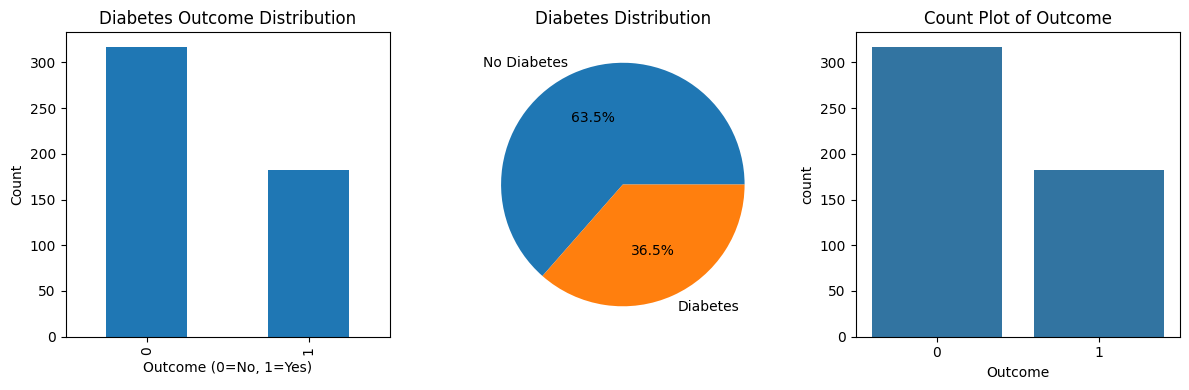

In [6]:
# Target distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Diabetes Outcome Distribution')
plt.xlabel('Outcome (0=No, 1=Yes)')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.pie(df['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%')
plt.title('Diabetes Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='Outcome', data=df)
plt.title('Count Plot of Outcome')

plt.tight_layout()
plt.show()

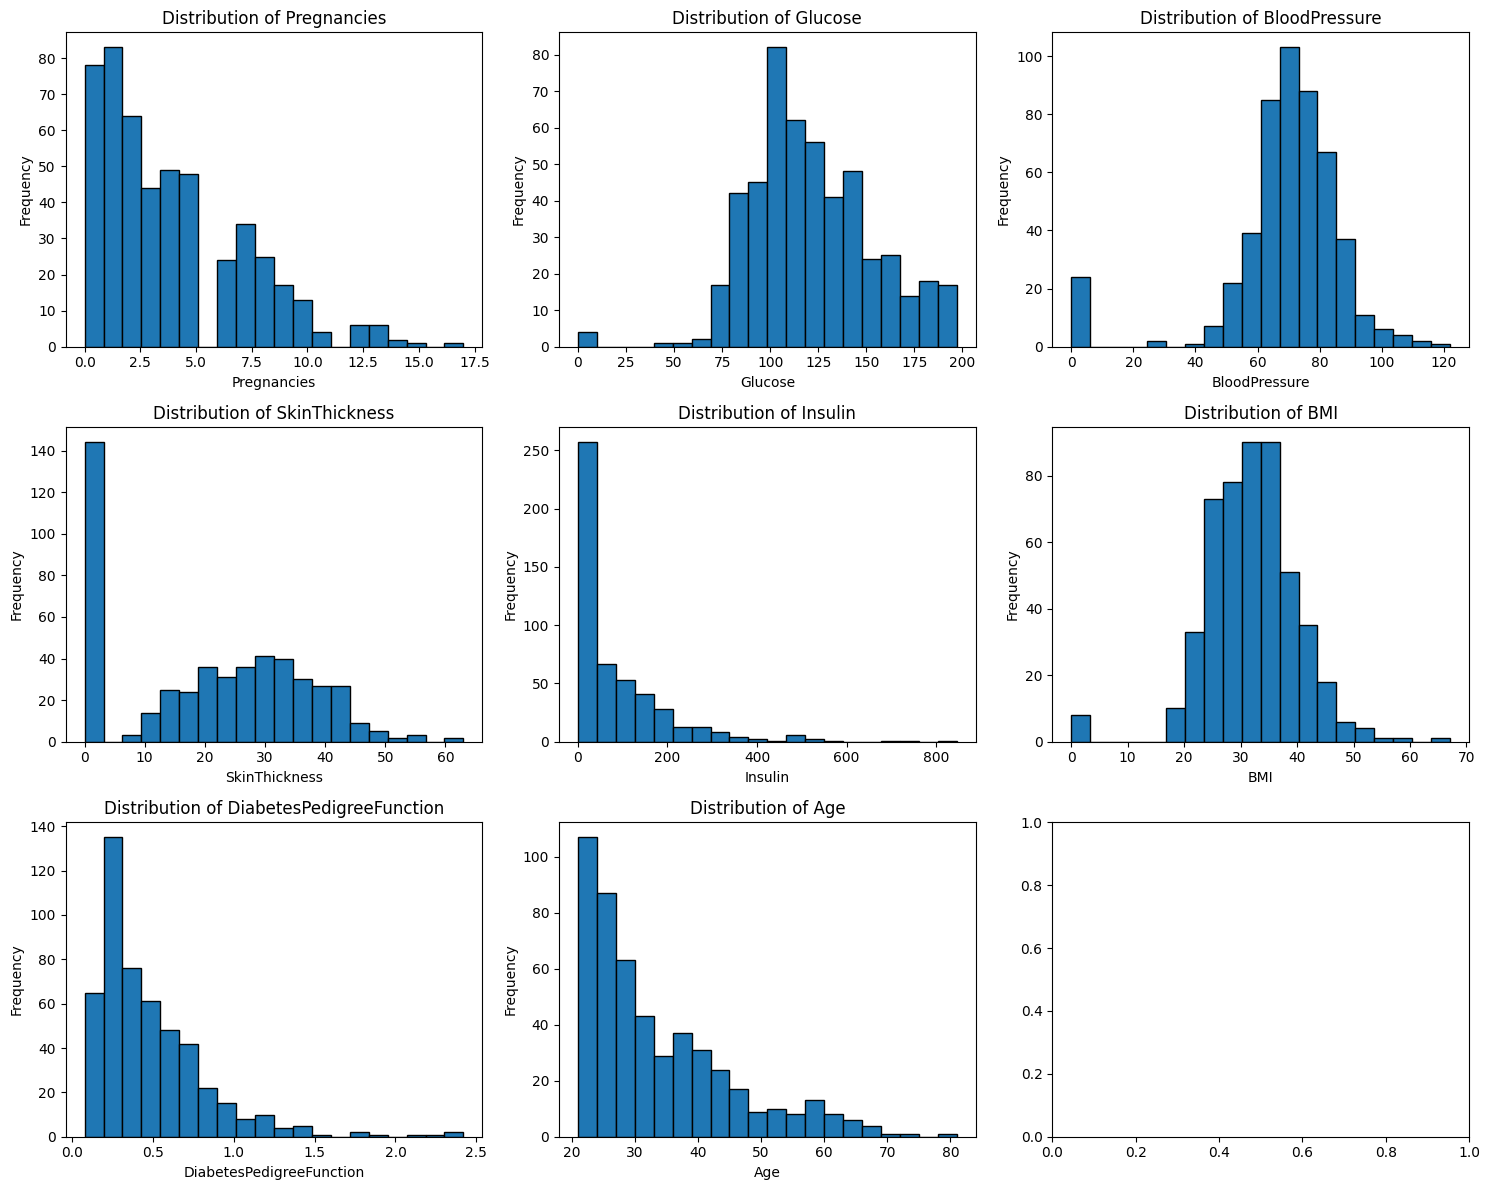

In [7]:
# Distribution of features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
features = df.columns[:-1]  # All except Outcome

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    axes[row, col].hist(df[feature], bins=20, edgecolor='black')
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

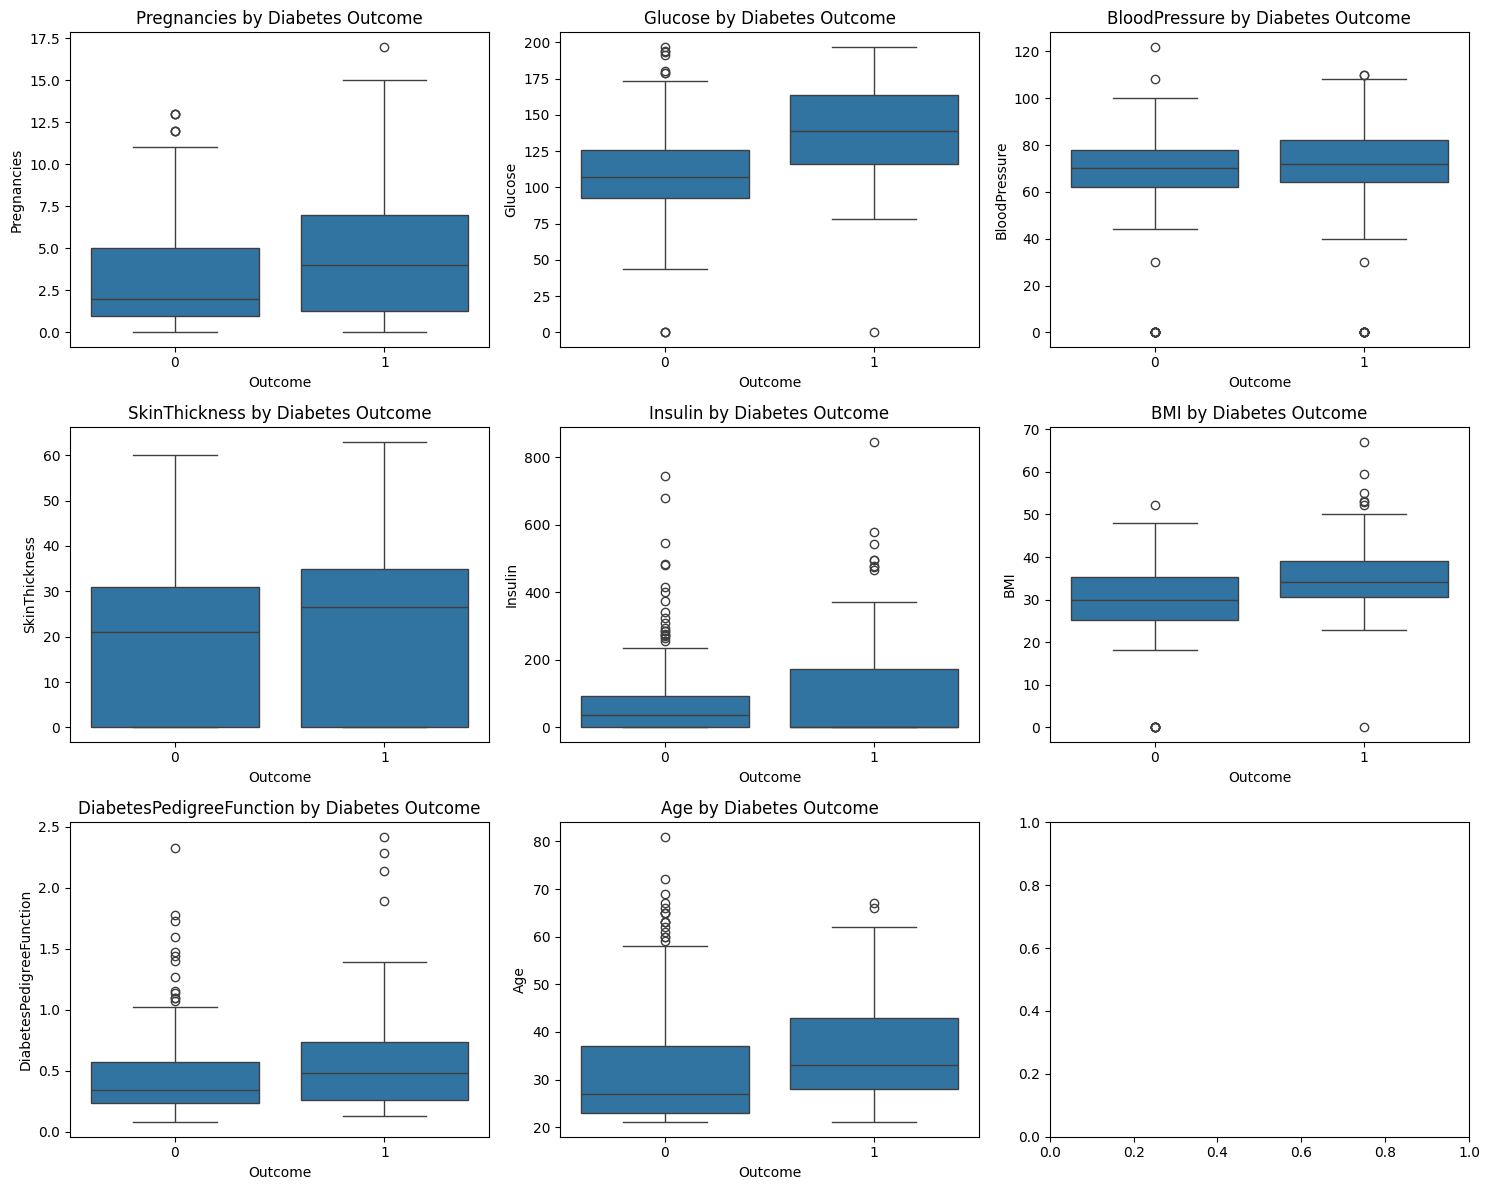

In [8]:
# Box plots by outcome
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(x='Outcome', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Diabetes Outcome')

plt.tight_layout()
plt.show()

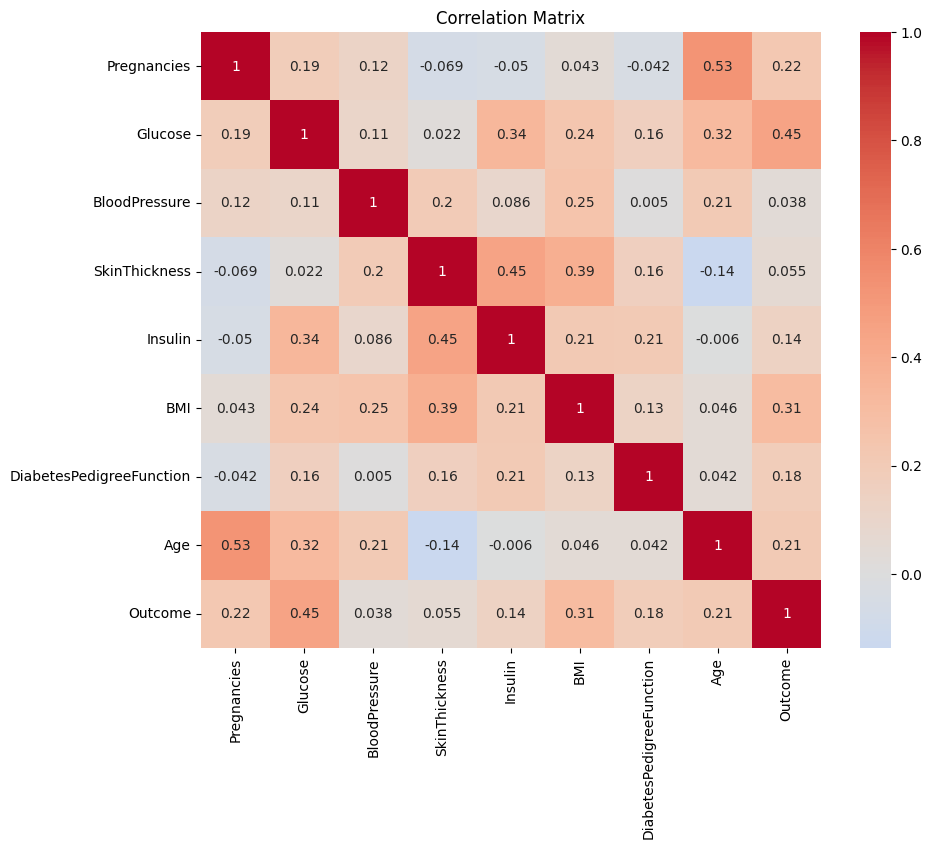

In [9]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

In [10]:
# Handle zero values (some zeros might be invalid)
# For biological features, 0 values are unrealistic
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("Zero values in biological features:")
for col in columns_with_zeros:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({zero_count/len(df)*100:.1f}%)")

Zero values in biological features:
Glucose: 4 zeros (0.8%)
BloodPressure: 24 zeros (4.8%)
SkinThickness: 144 zeros (28.9%)
Insulin: 242 zeros (48.5%)
BMI: 8 zeros (1.6%)


In [11]:
# Create processed dataset
df_processed = df.copy()

# Replace zeros with median for each group (diabetic/non-diabetic)
for col in columns_with_zeros:
    for outcome in [0, 1]:
        # Get median for this outcome group (excluding zeros)
        median_val = df_processed[(df_processed['Outcome'] == outcome) & (df_processed[col] > 0)][col].median()
        # Replace zeros with median
        mask = (df_processed['Outcome'] == outcome) & (df_processed[col] == 0)
        df_processed.loc[mask, col] = median_val

print("Zero values after preprocessing:")
print((df_processed == 0).sum())

Zero values after preprocessing:
Pregnancies                  78
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     317
dtype: int64


/var/folders/b4/mw0x9lsx0qgdrpkwycbvpj_00000gn/T/ipykernel_30216/2511323458.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '107.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_processed.loc[mask, col] = median_val


In [12]:
# Prepare features and target
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nFeature names:")
print(X.columns.tolist())

Features shape: (499, 8)
Target shape: (499,)

Feature names:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [13]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled features summary:")
print(X_scaled_df.describe())

Scaled features summary:
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  4.990000e+02  4.990000e+02   4.990000e+02   4.990000e+02  4.990000e+02   
mean  -1.423933e-17 -1.334938e-16   3.310645e-16  -1.637523e-16  1.441733e-16   
std    1.001004e+00  1.001004e+00   1.001004e+00   1.001004e+00  1.001004e+00   
min   -1.137976e+00 -2.562467e+00  -3.579005e+00  -2.510009e+00 -1.310952e+00   
25%   -8.387926e-01 -7.293172e-01  -6.958846e-01  -4.656763e-01 -5.014059e-01   
50%   -2.404259e-01 -1.728254e-01  -1.750332e-02  -1.249542e-01 -4.806483e-01   
75%    6.571242e-01  6.455449e-01   6.608780e-01   4.429159e-01  3.600339e-01   
max    3.948141e+00  2.445960e+00   4.222380e+00   3.850137e+00  7.324204e+00   

                BMI  DiabetesPedigreeFunction           Age  
count  4.990000e+02              4.990000e+02  4.990000e+02  
mean  -6.407700e-16              1.495130e-16 -1.637523e-16  
std    1.001004e+00              1.001004e+00  1.001004e+00

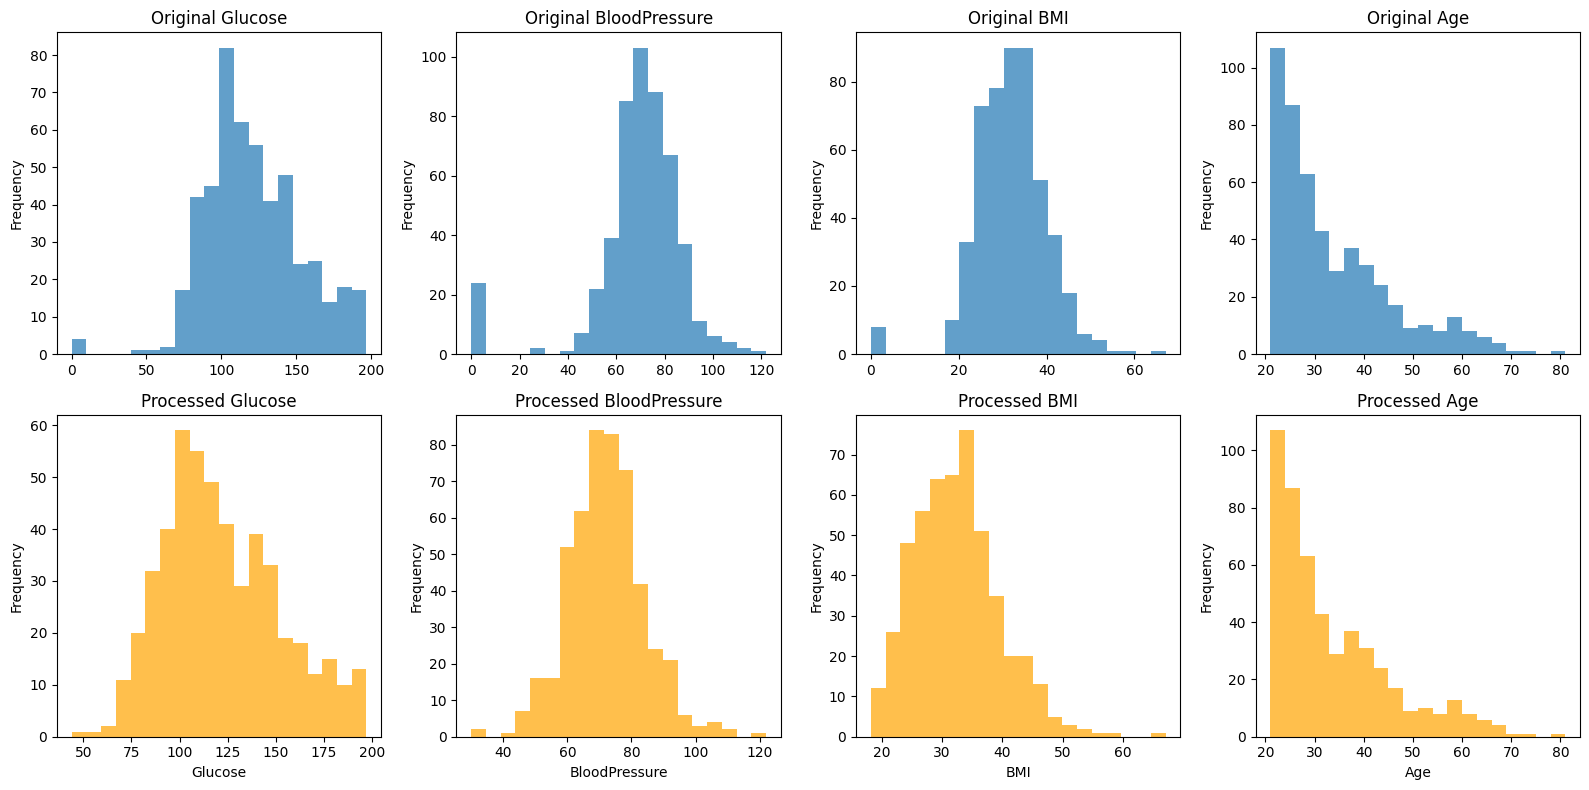

In [14]:
# Compare before and after preprocessing
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

sample_features = ['Glucose', 'BloodPressure', 'BMI', 'Age']

for i, feature in enumerate(sample_features):
    # Original
    axes[0, i].hist(df[feature], bins=20, alpha=0.7, label='Original')
    axes[0, i].set_title(f'Original {feature}')
    axes[0, i].set_ylabel('Frequency')
    
    # Processed
    axes[1, i].hist(df_processed[feature], bins=20, alpha=0.7, label='Processed', color='orange')
    axes[1, i].set_title(f'Processed {feature}')
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].set_xlabel(feature)

plt.tight_layout()
plt.show()

## Summary

**Dataset Overview:**
- Total records: 499 patients
- Features: 8 medical indicators
- Target: Diabetes outcome (0=No: 63.5%, 1=Yes: 36.5%)

**Critical Data Quality Issues Found:**
- **Zero values in biological features (highly problematic):**
  - Insulin: 242 zeros (48.5%) - Nearly half the data missing!
  - SkinThickness: 144 zeros (28.9%) - Significant missing data
  - BloodPressure: 24 zeros (4.8%) - Biologically impossible
  - BMI: 8 zeros (1.6%) - Cannot be zero
  - Glucose: 4 zeros (0.8%) - Minimal but important

**Data Preprocessing Applied:**
- Replaced zero values with group-specific medians (diabetic vs non-diabetic)
- Applied StandardScaler to normalize feature ranges
- Class imbalance present but manageable (63-37 split)

**Key Medical Insights:**
- Glucose levels most discriminative feature
- Strong correlation between age, BMI, and diabetes
- Pregnancies and diabetes pedigree function also important
- Blood pressure and skin thickness had substantial missing data issues

**Challenges for ML:**
- High proportion of missing data (especially insulin)
- May need advanced imputation or feature selection
- Consider ensemble methods robust to missing data

**Next Steps:**
- Compare different imputation strategies
- Use stratified train-test split due to class imbalance
- Apply classification algorithms (Logistic Regression, Random Forest, SVM)
- Focus on precision/recall metrics due to medical context
- Consider feature importance analysis post-modeling